<a href="https://colab.research.google.com/github/onostosia/heheh/blob/master/classification%20of%20images/Cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow_datasets 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
train, m = tensorflow_datasets.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteDK2W2U/cats_vs_dogs-train.tfrecord



Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


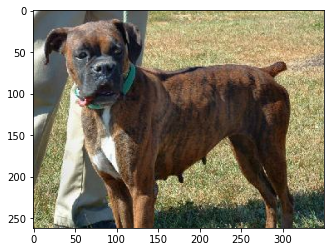

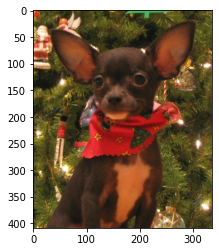

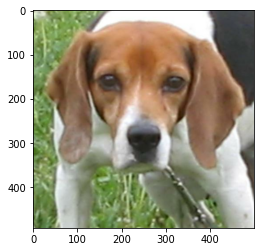

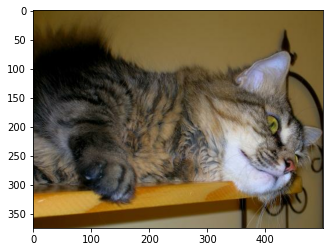

In [ ]:
for img, label in train[0].take(4):
  plt.figure()
  print(label)
  plt.imshow(img)

In [ ]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(250, 250, 3), include_top=False)
base_layers.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (250, 250))
  img = img / 255.0
  return img, label


In [ ]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

model.fit(train_batches, epochs=1)

1454/1454 [==============================] - 1036s 712ms/step - loss: 0.0673 - accuracy: 0.9743


In [ ]:
files.upload()

Saving кот.jpg to кот.jpg


{'кот.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc2\x00\x11\x08\x01\xc1\x02X\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xdc\xd5\x1f\x9f\xa1\xc9*\xe5YF\x0c\x8d\x83u\xbc\xaf>\x85js\x91\xa1\x1a\x19(\xb5\x93\xa1"\xd8\xbb\x18\x986\n\x99B\x85\x95)\xb7;MOCG\xda\xae\xc6erE\x92\x14hnB\xa6D\xcb5\x02\x05\x1dY\xca]w\x96\x8d:q\x1a\xe942\xe5d\xcc\x881\xa9\x9a\xd7\xa3\x1e\xdb\x13k8S@\x15\x8b8e*\x82\xae\xaa\x96J9t

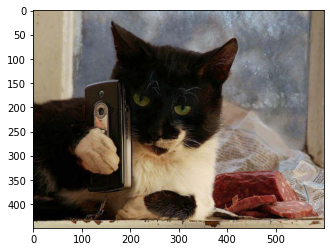

In [ ]:
img = load_img('/content/кот.jpg')
plt.figure()
plt.imshow(img)

In [ ]:
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
print(prediction)

-7.670576


In [ ]:
#################################################################################################################################

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for training data
train_image_generator

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150